### Data Collection and Exploration

##### Loading Dataset

In [259]:
# Importing all the necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [260]:
# Importing the dataset from csv file
df = pd.read_csv('Airbnb Listings Bangkok.csv', index_col=0)
df

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,NaN,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,NaN,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0


In [261]:
# Checking the first 5 rows
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


In [262]:
# Checking the last 5 rows
df.tail()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0
15853,790476492384199044,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.752960,100.540820,Private room,1214,1,0,NaN,NaN,14,365,0


##### Data Structure

In [263]:
df.shape

(15854, 16)

In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15854 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15854 non-null  int64  
 1   name                            15846 non-null  object 
 2   host_id                         15854 non-null  int64  
 3   host_name                       15853 non-null  object 
 4   neighbourhood                   15854 non-null  object 
 5   latitude                        15854 non-null  float64
 6   longitude                       15854 non-null  float64
 7   room_type                       15854 non-null  object 
 8   price                           15854 non-null  int64  
 9   minimum_nights                  15854 non-null  int64  
 10  number_of_reviews               15854 non-null  int64  
 11  last_review                     10064 non-null  object 
 12  reviews_per_month               10064

The dataset has contains thousands of airbnb listings.
The dataset has mix of both numerical and categorical values.

##### Statistical Summary

In [265]:
df.describe().T # T - transpose matrix (row to col, col to rows)

,count,mean,std,min,25%,50%,75%,max
id,15854.0,1.579397e+17,2.946015e+17,27934.00000,2.104509e+07,3.503734e+07,5.256154e+07,7.908162e+17
host_id,15854.0,1.541058e+08,1.318726e+08,58920.00000,3.974431e+07,1.224556e+08,2.390547e+08,4.926659e+08
latitude,15854.0,1.374514e+01,4.303957e-02,13.52730,1.372009e+01,1.373849e+01,1.375950e+01,1.395354e+01
longitude,15854.0,1.005599e+02,5.091058e-02,100.32955,1.005297e+02,1.005614e+02,1.005851e+02,1.009234e+02
price,15854.0,3.217704e+03,2.497212e+04,0.00000,9.000000e+02,1.429000e+03,2.429000e+03,1.100000e+06
minimum_nights,15854.0,1.529236e+01,5.081502e+01,1.00000,1.000000e+00,1.000000e+00,7.000000e+00,1.125000e+03
number_of_reviews,15854.0,1.665416e+01,4.061333e+01,0.00000,0.000000e+00,2.000000e+00,1.300000e+01,1.224000e+03
reviews_per_month,10064.0,8.131449e-01,1.090196e+00,0.01000,1.200000e-01,4.350000e-01,1.060000e+00,1.913000e+01
calculated_host_listings_count,15854.0,1.388962e+01,3.026985e+01,1.00000,1.000000e+00,4.000000e+00,1.300000e+01,2.280000e+02
availability_365,15854.0,2.443786e+02,1.258432e+02,0.00000,1.380000e+02,3.090000e+02,3.600000e+02,3.650000e+02


In [266]:
df.describe(include='object')

,name,host_name,neighbourhood,room_type,last_review
count,15846,15853,15854,15854,10064
unique,14794,5312,50,4,1669
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt,2022-12-11
freq,45,228,2153,8912,189


### Data Cleaning and Transformation

##### Handling Missing Value

In [267]:
df.isnull().sum()

id                                   0
name                                 8
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

The last_review and revies_per_month column has quite a lot missing values.

In [268]:
# Filling the numerical column missing values 
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

Listings with null reviews logically means no reviews, so filling all the null values with 0

In [269]:
# Filling the categorical column missing values 
obj_column = df.select_dtypes(include=['object']).columns # Taking all the object column in list

for col in obj_column:
    mode_col = df[col].mode()[0] # Only the highest freq. value saved
    df[col] = df[col].fillna(mode_col) # Filling the null values with mode value

In [270]:
# Checking if the missing values still exits or not
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

No null values remaining.

##### Outlier Detection

The outliers exits in multiple numerical columns but the most extreme and unrealistic outliers are found in 'price' and 'minimum_nights' columns.

Therefore, we removed the outliers from these two columns using IQR method, while keeping other columns unchanged to preserve real-world values. 

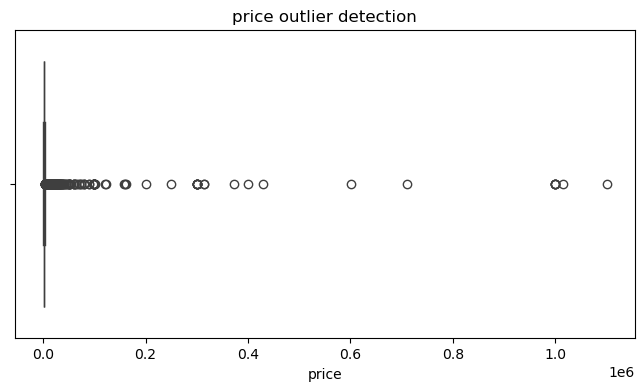

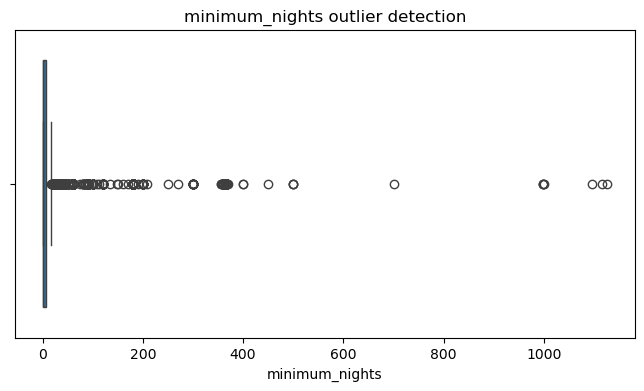

In [271]:
# Detecting outlier for price and minimum_nights columns using boxplot
outlier_col = ['price', 'minimum_nights']
for cols in outlier_col:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[cols])
    plt.title(cols + ' ' + 'outlier detection')
    plt.show()

The distribution of both 'price' and 'minimum_nights' is highly skewed with extreme high-price listings. These high-price listings may be luxury apartments or just dummy values.


##### IQR Method

In [272]:
# Function for IQR method
def remove_outlier_iqr(df, col):
    Q1 = df[col].quantile(0.25) # 25th percentile
    Q3 = df[col].quantile(0.75) # 75th percentile
    IQR = Q3 -Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)] # removes the outliers

In [273]:
# removing outliers froom price and minimum_nights
df = remove_outlier_iqr(df, 'price')
df = remove_outlier_iqr(df, 'minimum_nights')

Removing the outliers helps visualizing and analysis more meaningfully and realistically.

#### Data Transformation

##### Encode Categorical Columns:

One-Hot Encoding:

In [274]:
# Encoding the room_type column using one-hot encoding
room_dummies = pd.get_dummies(df['room_type'], prefix='room_type', drop_first=False)
df = pd.concat([df, room_dummies], axis=1)

df.sample(3)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
15478,780182994327045434,Live @ 5 condominium sukhumvit 5,491138082,จุฑามาศ,Vadhana,13.74241,100.55536,Entire home/apt,1800,7,0,2022-12-11,0.00,1,351,0,True,False,False,False
11910,52295813,Specious 1BR l Rooftop Pool l City View l near...,100622801,Oakwood Residence,Khlong Toei,13.72625,100.56919,Entire home/apt,4640,1,5,2022-10-19,1.29,5,362,5,True,False,False,False
11661,49743931,♥Sasi 401 : Deluxe Room @MRT Huai-Khwang/Free ...,240603715,Sasikarn,Huai Khwang,13.76841,100.57991,Private room,1290,1,3,2022-12-15,0.29,31,135,3,False,False,True,False


The room_type categorical column was converted into dummy columns using one-hot encoding while keeping the original column for better analysis and visualization.

##### Create new Feature

Generating new price_category feature from price column:

In [275]:
# calculating the 33% and 66% of price to assist in new feature creation
per_33 = df['price'].quantile(0.33)
per_66 = df['price'].quantile(0.66)
print(per_33, per_66)

1000.0 1777.0


In [276]:
df['price_category'] = pd.cut(
    df['price'],
    bins=[0, per_33, per_66, df['price'].max()],
    labels=['Low', 'Medium', 'High']
)
df.sample(3)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,price_category
4530,23114304,P.S.P. Home (Twin Bed),163667316,Benyabha,Chatu Chak,13.81956,100.58674,Private room,1100,1,...,2022-12-11,0.00,1,365,0,False,False,True,False,Medium
14854,740323382322484275,"Siam Plaengna-Napee4 Room, Chatuchak",311909791,Siamplaengna,Chatu Chak,13.79854,100.56422,Private room,950,2,...,2022-12-24,4.14,13,361,8,False,False,True,False,Low
13807,690955384594693967,7-1bed room bts thonglo SuperiorSpaApartment,402093105,Hi Gravity,Khlong Toei,13.72386,100.57474,Entire home/apt,1581,7,...,2022-11-21,1.89,45,241,7,True,False,False,False,Medium


The listings were divided into low, meduim, and high price categories to better analyze the price across room_type and neighborhoods.

Splitting last_review into day/month/year:

In [277]:
# Tranforming the last_review to datetime format
df['last_review'] = pd.to_datetime(df['last_review'])

# Dividing into Day, Month and Year
df['review_day'] = df['last_review'].dt.day
df['review_month'] = df['last_review'].dt.month
df['review_year'] = df['last_review'].dt.year

df.sample()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,availability_365,number_of_reviews_ltm,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,price_category,review_day,review_month,review_year
722,5662425,The Yard Bangkok Private Room - Yai,9692136,Som,Phaya Thai,13.77596,100.54097,Private room,1500,7,...,340,0,False,False,True,False,Medium,22,5,2018


Converting last_review to datetime format and separating into day, month and year which enables us for time-series analysis and visualization.